## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
%matplotlib inline

In [2]:
np.random.seed(2)

## Importing DATA

In [3]:
dataset = pd.read_csv('creditcard.csv')

## EDA

In [4]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### ***Ok as we can see data is anonymized!!***

## DATA Preprocessing

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [6]:
# Now we should scaling the amount feature
dataset['normalAmount'] = scaler.fit_transform(dataset['Amount'].values.reshape(-1, 1))
# Ok, now we should drop the original column
dataset = dataset.drop(['Amount'], axis=1)

In [7]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalAmount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [8]:
# We also drop time columns CUZ at this time we don't need that
dataset = dataset.drop(['Time'], axis=1)
dataset.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [9]:
# Splitting data to X and y
X = dataset.drop(['Class'], axis=1)
y = dataset['Class']

In [10]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,normalAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


In [11]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [12]:
# Splitting dataset to train and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [13]:
X_train.shape

(199364, 29)

In [14]:
X_test.shape

(85443, 29)

In [15]:
# Converting data to np array
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

## Deep Neural Network

In [16]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

/home/sparda/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [17]:
model = Sequential([
    Dense(units=16, input_dim=29, activation='relu'),
    Dense(units=24, activation='relu'),
    Dropout(0.5),
    Dense(units=20, activation='relu'),
    Dense(units=24, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                480       
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_4 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
_________________________________________________________________


## Train Neural Nets

In [19]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=15, epochs=5)

Epoch 1/5
199364/199364 [==============================] - 26s 129us/step - loss: 0.0101 - acc: 0.9979
Epoch 2/5
199364/199364 [==============================] - 25s 123us/step - loss: 0.0041 - acc: 0.9993
Epoch 3/5
199364/199364 [==============================] - 26s 129us/step - loss: 0.0035 - acc: 0.9993
Epoch 4/5
199364/199364 [==============================] - 27s 134us/step - loss: 0.0035 - acc: 0.9994
Epoch 5/5
199364/199364 [==============================] - 25s 127us/step - loss: 0.0034 - acc: 0.9994


In [20]:
score = model.evaluate(X_test, y_test)

85443/85443 [==============================] - 2s 23us/step


In [21]:
print('Accuracy: ',score[1])

Accuracy:  0.9994265182636377


In [22]:
# PREDICTIONS
y_pred = model.predict(X_test)
y_test = pd.DataFrame(y_test)

## EVALUATION

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

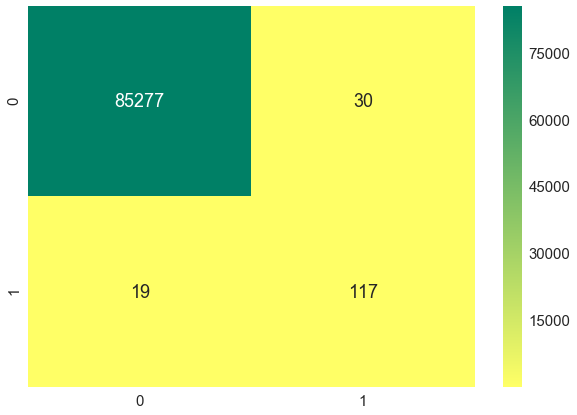

In [24]:
# CONFUSION MATRIX
cm = confusion_matrix(y_pred.round(), y_test)
df_cm = pd.DataFrame(cm, index=(0, 1), columns=(0, 1))
plt.figure(figsize=(10, 7))
sns.set(font_scale=1.5)
sns.heatmap(df_cm, fmt='g', annot=True, cmap='summer_r')
plt.show()

In [25]:
print('ACCURACY SCORE:\n', accuracy_score(y_test, y_pred.round()), '\n')
print('PRECISION SCORE:\n', precision_score(y_test, y_pred.round()), '\n')
print("RECALL SCORE:\n", recall_score(y_test, y_pred.round()), '\n')
print("F1 SCORE:\n", f1_score(y_test, y_pred.round()))

ACCURACY SCORE:
 0.9994265182636377 

PRECISION SCORE:
 0.8602941176470589 

RECALL SCORE:
 0.7959183673469388 

F1 SCORE:
 0.8268551236749118


## Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [28]:
rfc_pred = rfc.predict(X_test)

In [29]:
rfc_score = rfc.score(X_test, y_test)
print('Accuracy: ', score[1])

Accuracy:  0.9994265182636377


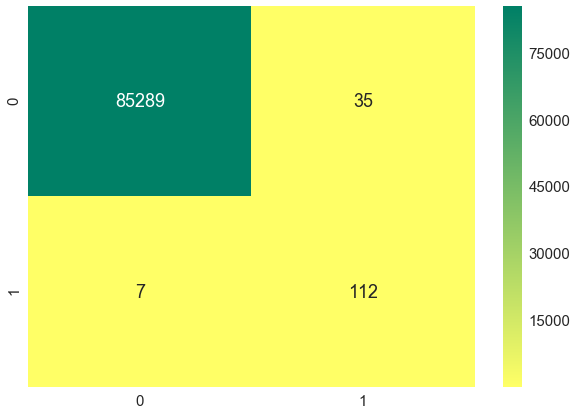

In [30]:
# RFC CONFUSION MATRIX
cm = confusion_matrix(rfc_pred.round(), y_test)
df_cm = pd.DataFrame(cm, index=(0, 1), columns=(0, 1))
plt.figure(figsize=(10, 7))
sns.set(font_scale=1.5)
sns.heatmap(df_cm, fmt='g', annot=True, cmap='summer_r')
plt.show()

In [31]:
print('ACCURACY SCORE:\n', accuracy_score(y_test, rfc_pred.round()), '\n')
print('PRECISION SCORE:\n', precision_score(y_test, rfc_pred.round()), '\n')
print("RECALL SCORE:\n", recall_score(y_test, rfc_pred.round()), '\n')
print("F1 SCORE:\n", f1_score(y_test, rfc_pred.round()))

ACCURACY SCORE:
 0.9995084442259752 

PRECISION SCORE:
 0.9411764705882353 

RECALL SCORE:
 0.7619047619047619 

F1 SCORE:
 0.8421052631578947


## SMOTE - OVER SAMPLING

In [33]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [34]:
X_resample, y_resample = smote.fit_sample(X, y.values.ravel())

In [35]:
y_resample = pd.DataFrame(y_resample)
X_resample = pd.DataFrame(X_resample)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size=0.3, random_state=0)

In [37]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [38]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=15, epochs=5)

Epoch 1/5
398041/398041 [==============================] - 57s 143us/step - loss: 0.0351 - acc: 0.9880
Epoch 2/5
398041/398041 [==============================] - 56s 141us/step - loss: 0.0137 - acc: 0.9964
Epoch 3/5
398041/398041 [==============================] - 55s 138us/step - loss: 0.0112 - acc: 0.9972
Epoch 4/5
398041/398041 [==============================] - 58s 146us/step - loss: 0.0098 - acc: 0.9976
Epoch 5/5
398041/398041 [==============================] - 57s 142us/step - loss: 0.0095 - acc: 0.9978


In [39]:
new_pred = model.predict(X_test)

In [40]:
rfc_score = rfc.score(X_test, y_test)
print('Accuracy: ', score[1])

Accuracy:  0.9994265182636377


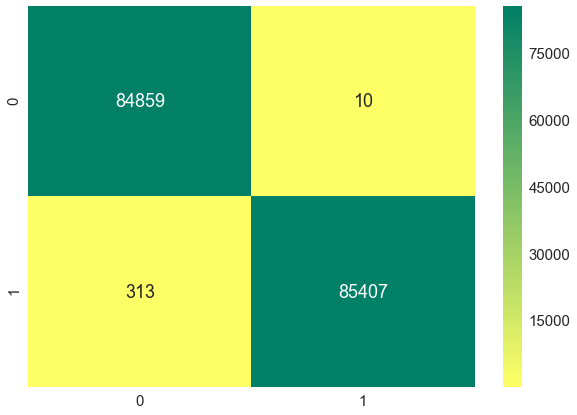

In [41]:
# RFC CONFUSION MATRIX
cm = confusion_matrix(new_pred.round(), y_test)
df_cm = pd.DataFrame(cm, index=(0, 1), columns=(0, 1))
plt.figure(figsize=(10, 7))
sns.set(font_scale=1.5)
sns.heatmap(df_cm, fmt='g', annot=True, cmap='summer_r')
plt.show()

In [42]:
print('ACCURACY SCORE:\n', accuracy_score(y_test, new_pred.round()), '\n')
print('PRECISION SCORE:\n', precision_score(y_test, new_pred.round()), '\n')
print("RECALL SCORE:\n", recall_score(y_test, new_pred.round()), '\n')
print("F1 SCORE:\n", f1_score(y_test, new_pred.round()))

ACCURACY SCORE:
 0.9981065602119714 

PRECISION SCORE:
 0.9963485767615492 

RECALL SCORE:
 0.9998829272861374 

F1 SCORE:
 0.9981126232199933


# FIN